<a href="https://colab.research.google.com/github/StevenBryceLee/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/Copy_of_LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [81]:
labels = df['diagnosis']

In [82]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [ ]:
import seaborn as sns
sns.pairplot(df[:3])

In [83]:
# Perform K-Means Clustering on the Dataset
#Dropping the random 32nd column full of NaNs
df.drop('Unnamed: 32',inplace = True,axis = 1)

In [84]:
#Find the correct clusters using elbow method
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    sum_of_squared_distances.append(km.inertia_)

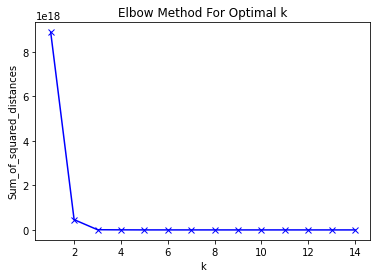

In [85]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [86]:
#Probably good to make that a function
def optimal_k(df):
  '''
  This function takes a dataframe, and finds the optimal
  number of nearest neighbors for a Pandas Dataframe
  using the elbow method 

  df is a pandas dataframe

  returns an int as the optimal number of clusters
  '''
  sum_of_squared_distances = []
  #Start with 2 because 1 clustering doesn't really help
  for k in range(2,15):
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    sum_of_squared_distances.append(km.inertia_)
    #print(sum_of_squared_distances)
    #If there is a very small gain in inertia, end the search
    if (len(sum_of_squared_distances) > 1 and 
    (sum_of_squared_distances[-1] - sum_of_squared_distances[-2]) < 0.001):
      return k
  return k

In [87]:
optimal_k(df)

3

In [88]:
#Performing k means without scaling just on raw data
kmeans = KMeans(n_clusters = optimal_k(df))
kmeans.fit(df)
df['predictions'] = kmeans.labels_
df.head(10)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,predictions
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,2
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,843786,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,2
6,844359,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,2
7,84458202,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,2
9,84501001,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [89]:
df['predictions'].value_counts()

2    488
0     70
1     11
Name: predictions, dtype: int64

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [90]:
#Reducing to two clusters to see how accurate this is
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df)
df['predictions'] = kmeans.labels_


In [91]:
df['predictions']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    0
Name: predictions, Length: 569, dtype: int32

In [92]:
labels

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [93]:
#Get int labels for comparison
def changelabel(string):
  labeldict = {'M':1,'B':0}
  return labeldict[string]
intlabels = labels.apply(changelabel)
intlabels

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [94]:
((sum([1 if intlabels[x] == df['predictions'][x] else 0 
      for x in intlabels.index])) 
      / len(intlabels))

0.6256590509666081

Looks like 62.5% accurate. Kinda bad, better than random

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [95]:
#Standardize data
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

In [96]:
def ScreePlot(PCA):
  '''
  Shows a scree plot of a PCA instance fitted on a dataframe
  PCA is a PCA instantiation from scikit learn

  returns nothing

  '''
  #Get the number of columns
  num_components=len(PCA.explained_variance_ratio_)
  #Get a range for the index
  index = np.arange(num_components)
  #Get the values for the graph, which is the percentage of explained variance
  values = PCA.explained_variance_ratio_
  #Get a cumulative sum as a list for a line showing increased performance
  cumulativeVals = np.cumsum(values)

  #Plot the actual values of explained variance and cumulative explained variance
  plt.figure(figsize=(18, 6))
  ax = plt.subplot(111)
  ax.bar(index, values)
  ax.plot(index, cumulativeVals)

  #Annotate each bar with the percent of explained variance
  for i in range(num_components):
    ax.annotate(r"%s" % ((str(values[i]*100)[:3])), (index[i], values[i]), va="bottom", ha="center", fontsize=4.5)
 
  ax.xaxis.set_tick_params(width=0)
  ax.yaxis.set_tick_params(width=2, length=12)

  ax.set_xlabel("Principal Component")
  ax.set_ylabel("Variance Explained (%)")
  plt.title('Explained Variance Per Principal Component')

In [99]:
#First try clustering just on PC1 and PC2 so that you can make a scatterplot
pca = PCA(2)
pca.fit(scaled)

explained = sum(pca.explained_variance_ratio_)
print(explained)
colnames = ['PC'+str(x) for x in range((len(pca.explained_variance_ratio_)))]
PCADF = pd.DataFrame(pca.transform(scaled),columns = colnames)


0.5936268844528376


In [100]:
PCADF.head()

,PC0,PC1
0,9.176281,1.994417
1,2.380743,-3.737364
2,5.739059,-1.067103
3,7.114744,10.286398
4,3.944187,-1.955890


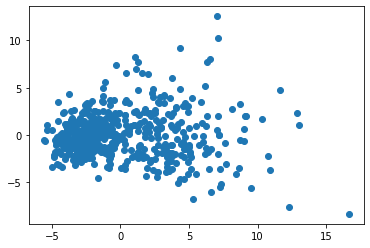

In [101]:
#Plot the results
plt.scatter(PCADF['PC0'],PCADF['PC1'])
plt.show()

In [102]:
#Check accuracy of PCA with 2 columns
kmeans = KMeans(n_clusters = 2)
kmeans.fit(PCADF)
PCADF['predictions'] = kmeans.labels_

((sum([1 if intlabels[x] == PCADF['predictions'][x] else 0 
      for x in intlabels.index])) 
      / len(intlabels))

0.9068541300527241

Huge jump in accuracy! Still, I would want to be more certain if I was diagnosing cancer

In [107]:
#Now trying with scaling and PCA
def PCAtrainer(df):
  '''
  This function performs principal component analysis on a dataframe
  It increases the number of columns in the PCA until 90% of the variance is explained

  df is a pandas dataframe scaled with scikitlearn's standardScaler

  returns a dataframe with PCA columns
  '''
  explained = 0
  index = 3
  while (explained < 0.90):
    #Get principal component analysis class with index number of columns
    pca = PCA(index)
    pca.fit(scaled)
    #increment explained until it reaches 90%
    explained = sum(pca.explained_variance_ratio_)
    print(explained)
    index += 1

  #Plot the results
  ScreePlot(pca)
  
  return pd.DataFrame(pca.transform(scaled), 
                      columns = ['PC'+str(x) 
                      for x in range((len(pca.explained_variance_ratio_)))])

0.6843490263725751
0.7464102807212423
0.8058828813566798
0.8573960569306194
0.8945714168347567
0.9156361050887757


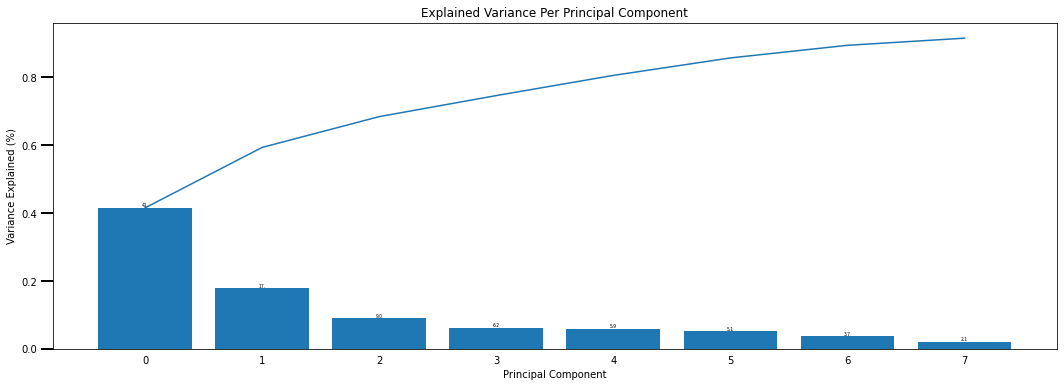

In [109]:
#Standardize data
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

#
PCA90DF = PCAtrainer(scaled)

In [106]:
PCA90DF.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,predictions
0,9.176281,1.994417,-1.250350,3.576611,0.641776,-1.204637,1.370816,2.168186,0
1,2.380743,-3.737364,-0.695691,1.175340,-0.091725,0.610468,-0.027875,0.023806,0
2,5.739059,-1.067103,-0.567370,0.861318,0.279682,-0.176369,0.549845,-0.672400,0
3,7.114744,10.286398,-2.935701,-0.162663,1.109964,-2.941389,3.178640,1.383914,0
4,3.944187,-1.955890,1.311379,2.916216,0.509646,0.552014,-1.229725,-0.929203,0


In [110]:
#Now checking accuracy for 90% explained variance clustering
#Check accuracy of PCA with 2 columns
kmeans = KMeans(n_clusters = 2)
kmeans.fit(PCA90DF)
PCA90DF['predictions'] = kmeans.labels_

((sum([1 if intlabels[x] == PCA90DF['predictions'][x] else 0 
      for x in intlabels.index])) 
      / len(intlabels))

0.9103690685413005

Interesting. Not really much better. Only a 1% increase in performance

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

The PC1,PC2 clustering scatterplot does not really resemble the raw data scatterplots for any of the data that I examined. This makes sense, because PCA sort of makes us rotate scatterplots and look at it from another dimension

Accuracy scores increased greatly for basic PCA with 2 columns, but only increased a little bit more even for 90% of variance explained

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project